# Results Execution - Assignment 2

Importing libraries and custom-built functions...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from concurrent.futures import ProcessPoolExecutor

from src.monte_carlo import random_walk
from src.fractal_dimensions import fractal_dimension, plot_subplots
from src.gray_scott import simulate_gray_scott
from src.frames import main as run_frames_main
from src.earlystop import main as run_earlystop_main

## Diffusion Limited Aggregation

In [ ]:
run_earlystop_main()

In [ ]:
run_frames_main()

## Monte Carlo simulation of DLA
**Plot final grid for different $p_s$ values**

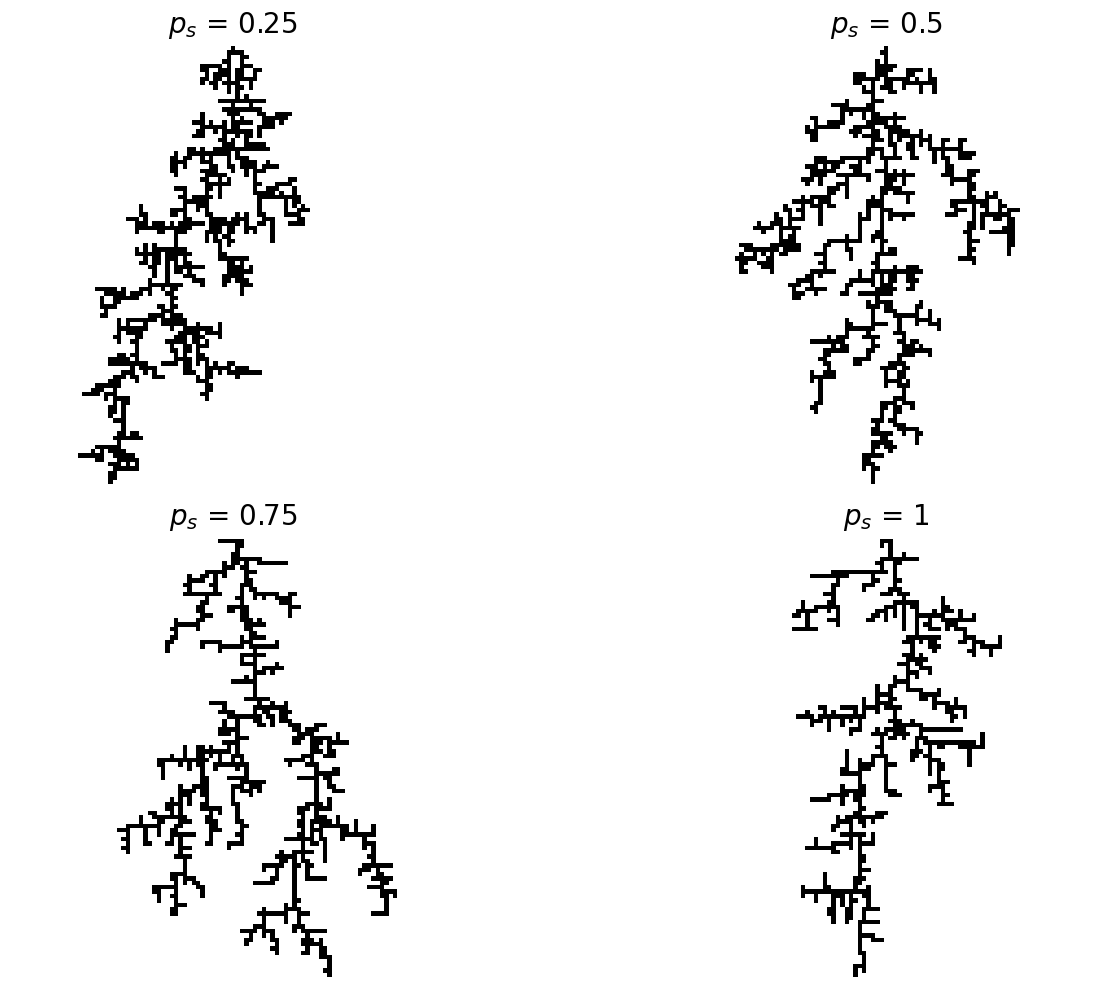

In [2]:
N = 100
p_values = [0.25,0.5,0.75,1]
plot_subplots(N, p_values)

**Plot fractal dimension for different $p_s$ values**

...finished execution for p=0.01
...finished execution for p=0.02
...finished execution for p=0.03
...finished execution for p=0.04
...finished execution for p=0.05
...finished execution for p=0.060000000000000005
...finished execution for p=0.06999999999999999
...finished execution for p=0.08
...finished execution for p=0.09
...finished execution for p=0.09999999999999999
...finished execution for p=0.11
...finished execution for p=0.12
...finished execution for p=0.13
...finished execution for p=0.14
...finished execution for p=0.15000000000000002
...finished execution for p=0.16
...finished execution for p=0.17
...finished execution for p=0.18000000000000002
...finished execution for p=0.19
...finished execution for p=0.2
...finished execution for p=0.21000000000000002
...finished execution for p=0.22
...finished execution for p=0.23
...finished execution for p=0.24000000000000002
...finished execution for p=0.25
...finished execution for p=0.26
...finished execution for p=0.27
...f

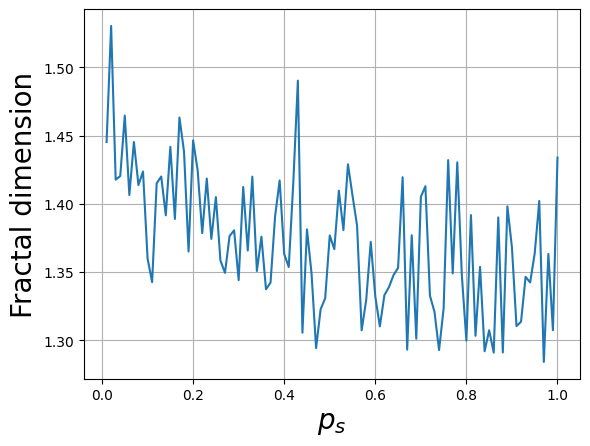

In [3]:
p_values = np.arange(0.01, 1.01, 0.01)
num_p = len(p_values)
iter = 1
fract = np.zeros(num_p)
j = 0
for p in p_values:
    fract_p = np.zeros(iter)
    for i in range(iter):
        grid = random_walk(N,p)
        fract_p[i] = fractal_dimension(grid)
    fract[j] = np.mean(fract_p)
    j+=1
    print(f"...finished execution for p={p}")

plt.plot(p_values, fract)
plt.xlabel("$p_s$", fontsize=20)
plt.ylabel("Fractal dimension", fontsize=20)
plt.grid(True)
plt.show()

## The Gray-Scott model - A reaction-diffusion system

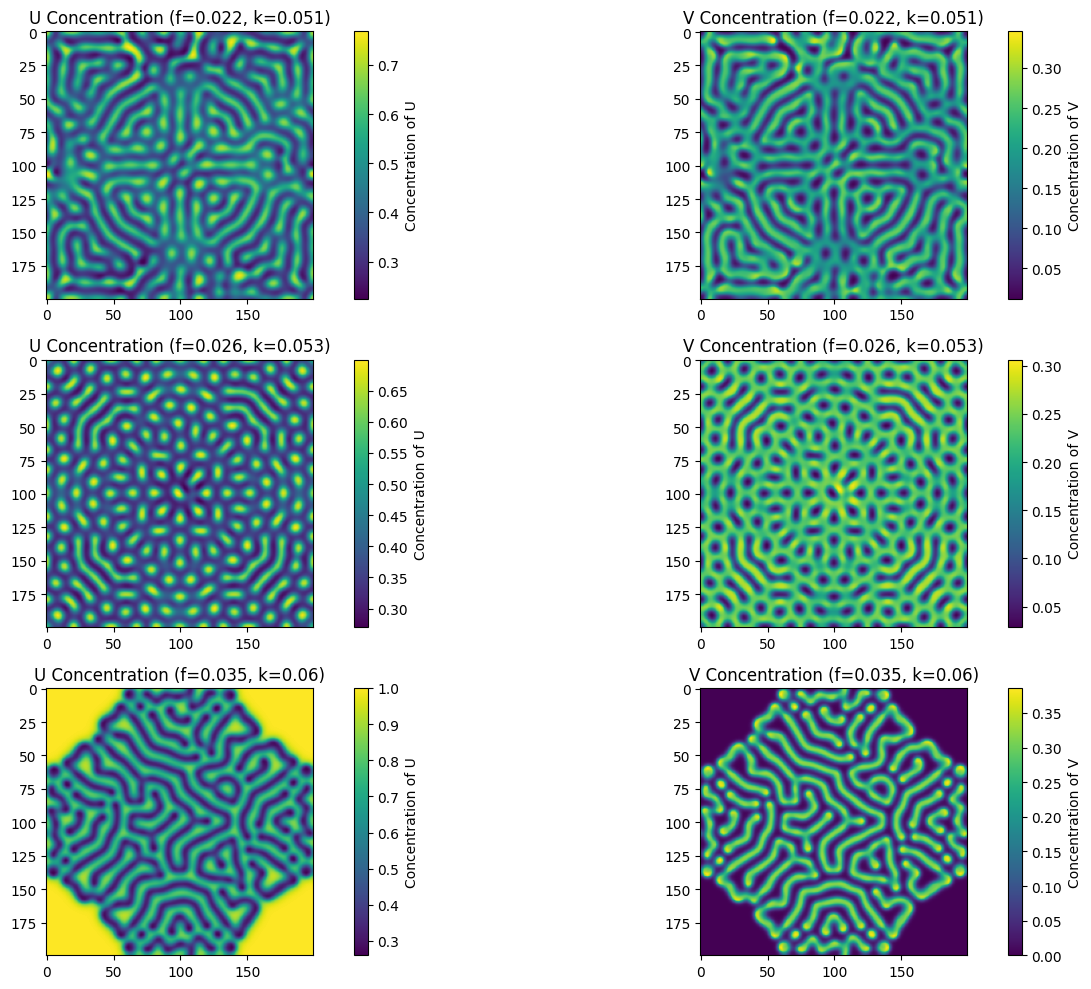

In [4]:
Du = 0.16
Dv = 0.08
dt = 1.0
dx = 1.0
f_list = [0.022, 0.026, 0.035]
k_list = [0.051, 0.053, 0.060]

plt.figure(figsize=(15, 10))

for idx, f in enumerate(f_list):
    k = k_list[idx]
    
    # Run simulation
    u, v = simulate_gray_scott(Du=Du, Dv=Dv, f=f, k=k, dt=dt, dx=dx)
    
    #plot U
    plt.subplot(3, 2, 2*idx + 1)
    im = plt.imshow(u, cmap='viridis')
    plt.colorbar(im, label='Concentration of U')
    plt.title(f'U Concentration (f={f}, k={k})')
    
    #plot V
    plt.subplot(3, 2, 2*idx + 2)
    im = plt.imshow(v, cmap='viridis')
    plt.colorbar(im, label='Concentration of V')
    plt.title(f'V Concentration (f={f}, k={k})')

plt.tight_layout()
plt.show()